# DS-SF-25 | Codealong 07 | Introduction to Regression and Model Fit, Part 2

In [18]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

# TODO

from sklearn import feature_selection, linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

## Part A - Model's F-statistic

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-07.csv'), index_col = 'ID')

> ### `SalePrice` as a function of `Size`

In [4]:
model = smf.ols(formula='SalePrice ~ Size', data = df).fit()
model.summary()

# Prob of F-Stat is the f-stat for P-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Wed, 03 Aug 2016   Prob (F-statistic):           2.67e-58
Time:                        18:57:52   Log-Likelihood:                -1687.9
No. Observations:                 967   AIC:                             3380.
Df Residuals:                     965   BIC:                             3390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1551      0.084      1.842      0.066        -0.010     0.320
Size           0.7497      0.043     17.246      0.000         0.664     0.835
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                         4.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalePrice` as a function of `IsAStudio`

In [5]:
model = smf.ols(formula='SalePrice ~ IsAStudio', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07775
Date:                Wed, 03 Aug 2016   Prob (F-statistic):              0.780
Time:                        18:58:46   Log-Likelihood:                -1847.4
No. Observations:                 986   AIC:                             3699.
Df Residuals:                     984   BIC:                             3709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.3811      0.051     27.088      0.000         1.281     1.481
IsAStudio      0.0829      0.297      0.279      0.780        -0.501     0.666
==============================================================================
Omnibus:                     1682.807   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1342290.714
Skew:                          10.942   Prob(JB):                         0.00
Kurtosis:                     182.425   Cond. No.                         5.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model's F-value (with significance level of `5%`)

In [6]:
model.fvalue

0.077751247187816605

### Corresponding p-value

In [7]:
model.f_pvalue

0.78042689060360249

## Part B1 - Linear Regression Modeling with `sklearn`

In [19]:
def summary(X, y, model):
    fvalues, f_pvalues = feature_selection.f_regression(X, y)
    print 'F-statistic (not join but instead done sequentially for each regressor)'
    print '- F-value', fvalues
    print '- p-value', f_pvalues
    print

    print 'R^2 =', model.score(X, y) # for linear reg, score is r^2
    print

    print 'Coefficients'
    print '- beta_0 (Intercept) = {}'.format(model.intercept_)
    for i, coef in enumerate(model.coef_):
        print '- beta_{} ({}) = {}'.format(i + 1, X.columns[i], coef)
        
#  model.f

> ### Remove samples with `NaN` in `IsAStudio`, `Size`, or `LotSize`

In [15]:
df=df.dropna(subset=['IsAStudio', 'Size','LotSize'])

df.dropna(subset=['IsAStudio', 'Size','LotSize'])
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.1500,0.0,NaN,2.0,1.430,2.435,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.6000,0.0,2.0,3.5,2.040,3.920,1976.0
15064536,"2300 Leavenworth St, San Francisco, CA",12/4/15,2.8300,0.0,3.0,2.0,2.115,1.271,1913.0
15064640,"1047-1049 Lombard St, San Francisco, CA",1/14/16,4.0500,1.0,NaN,NaN,4.102,3.049,1948.0
15065810,"1327-1329 Kearny St, San Francisco, CA",11/25/15,2.2500,0.0,NaN,4.0,2.658,1.600,1906.0
15066281,"1807 Jones St, San Francisco, CA",12/15/15,1.7000,0.0,2.0,2.0,1.467,3.023,1922.0
15066839,"1163-1165 Vallejo St, San Francisco, CA",12/1/15,0.3000,0.0,NaN,2.0,2.344,1.376,1913.0
15067302,"948 Jackson St, San Francisco, CA",11/13/15,1.9500,0.0,NaN,4.0,4.362,1.459,1908.0
15068767,"767-771 Pine St, San Francisco, CA",12/31/15,2.4900,0.0,NaN,4.0,4.605,1.376,1909.0


### SalePrice ~ IsAStudio with `statsmodels`

In [16]:
smf.ols(formula = 'SalePrice ~ IsAStudio', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2519
Date:                Wed, 03 Aug 2016   Prob (F-statistic):              0.616
Time:                        19:40:41   Log-Likelihood:                -1159.0
No. Observations:                 545   AIC:                             2322.
Df Residuals:                     543   BIC:                             2331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5571      0.088     17.615      0.000         1.383     1.731
IsAStudio      0.2589      0.516      0.502      0.616        -0.755     1.272
==============================================================================
Omnibus:                      860.527   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           301122.117
Skew:                           8.992   Prob(JB):                         0.00
Kurtosis:                     116.741   Cond. No.                         5.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### SalePrice ~ IsAStudio with `sklearn`

In [20]:
X = df[ ['IsAStudio'] ]
y = df.SalePrice

# TODO
model = linear_model.LinearRegression().fit(X,y)
summary(X, y, model)

F-statistic (not join but instead done sequentially for each regressor)
- F-value [ 0.25187926]
- p-value [ 0.61595836]

R^2 = 0.000463650973037

Coefficients
- beta_0 (Intercept) = 1.55707559924
- beta_1 (IsAStudio) = 0.258924400756


### SalePrice ~ Size + LotSize with `statsmodels`

In [21]:
smf.ols(formula = 'SalePrice ~ Size + LotSize', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     78.29
Date:                Wed, 03 Aug 2016   Prob (F-statistic):           1.36e-30
Time:                        19:45:07   Log-Likelihood:                -1090.0
No. Observations:                 545   AIC:                             2186.
Df Residuals:                     542   BIC:                             2199.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1902      0.173     -1.098      0.273        -0.530     0.150
Size           0.8171      0.069     11.907      0.000         0.682     0.952
LotSize        0.0500      0.037      1.362      0.174        -0.022     0.122
==============================================================================
Omnibus:                      974.589   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           812622.772
Skew:                          11.225   Prob(JB):                         0.00
Kurtosis:                     190.833   Cond. No.                         9.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### SalePrice ~ Size + LotSize with `sklearn`

In [29]:
X=df[['Size','LotSize']]


y = df.SalePrice

model = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

summary(X,y,model)

F-statistic (not join but instead done sequentially for each regressor)
- F-value [ 154.47734612   11.74608887]
- p-value [  2.18094764e-31   6.55921409e-04]

R^2 = 0.222407217045

Coefficients
- beta_0 (Intercept) = 0.0
- beta_1 (Size) = 0.767908652102
- beta_2 (LotSize) = 0.0310721076812


## Part B2 - Linear Regression Modeling with `sklearn` (cont.)

In [30]:
df = pd.read_csv(os.path.join('..', 'datasets', 'advertising.csv'))

# budget spent on advert and sales

In [31]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


## Plots

> ### Sales ~ TV

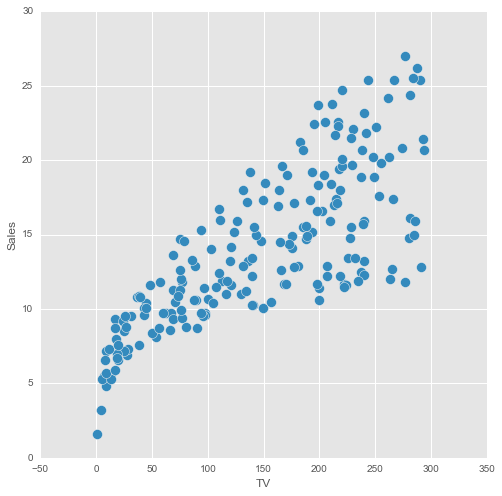

In [33]:
df.plot(kind = 'scatter', x = 'TV', y = 'Sales', s = 100, figsize = (8, 8))

> ### Sales ~ Radio

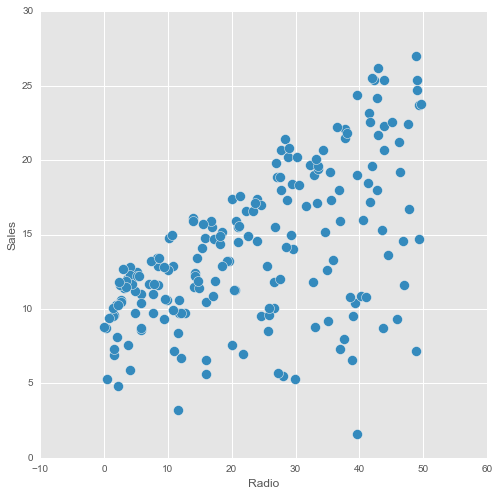

In [34]:
df.plot(kind = 'scatter', x = 'Radio', y = 'Sales', s = 100, figsize = (8, 8))

> ### Sales ~ Newspaper

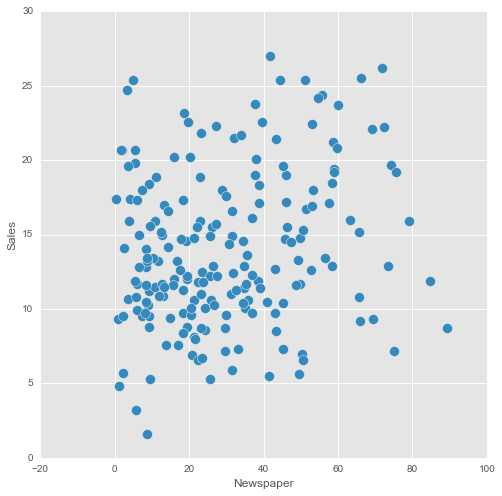

In [35]:
df.plot(kind = 'scatter', x = 'Newspaper', y = 'Sales', s = 100, figsize = (8, 8))

## Simple linear regressions

> ### Sales ~ TV

In [66]:
X = df[['TV']]
y = df['Sales']


model_tv = linear_model.LinearRegression().fit(X,y)
summary(X,y,model_tv)

print ""

model_tv2 = smf.ols(formula= 'Sales ~ 1 + TV', data= df).fit()
model_tv2.summary()

F-statistic (not join but instead done sequentially for each regressor)
- F-value [ 302.76493388]
- p-value [  1.28688630e-41]

R^2 = 0.607029310433

Coefficients
- beta_0 (Intercept) = 7.0305614564
- beta_1 (TV) = 0.0473810293804



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Wed, 03 Aug 2016   Prob (F-statistic):           1.29e-41
Time:                        20:23:23   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000         6.120     7.942
TV             0.0474      0.003     17.400      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Sales ~ Radio

In [49]:
X = df[['Radio']]
y = df['Sales']


model_radio = linear_model.LinearRegression().fit(X,y)
summary(X,y,model_tv)

print ""

model_radio2 = smf.ols(formula= 'Sales ~ 1 + Radio', data= df).fit()
model_radio2.summary()

F-statistic (not join but instead done sequentially for each regressor)
- F-value [ 97.69362923]
- p-value [  5.98974315e-19]

R^2 = 0.153498591376

Coefficients
- beta_0 (Intercept) = 12.319347327
- beta_1 (Radio) = 0.0557962701635



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Wed, 03 Aug 2016   Prob (F-statistic):           5.99e-19
Time:                        20:13:42   Log-Likelihood:                -566.70
No. Observations:                 198   AIC:                             1137.
Df Residuals:                     196   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3166      0.560     16.622      0.000         8.211    10.422
Radio          0.2016      0.020      9.884      0.000         0.161     0.242
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Sales ~ Newspaper

F-statistic (not join but instead done sequentially for each regressor)
- F-value [ 9.92653534]
- p-value [ 0.00188449]

R^2 = -1.09515227339

Coefficients
- beta_0 (Intercept) = 7.0305614564
- beta_1 (Newspaper) = 0.0473810293804

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Wed, 03 Aug 2016   Prob (F-statistic):            0.00188
Time:                        20:26:33   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                    

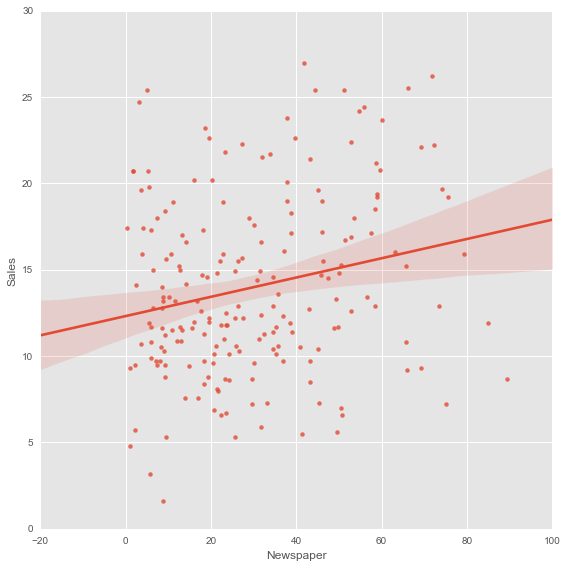

In [68]:
X = df[['Newspaper']]
y = df['Sales']


model_newspaper = linear_model.LinearRegression().fit(X,y)
summary(X,y,model_tv)

print ""

model_newspaper2 = smf.ols(formula= 'Sales ~ 1 + Newspaper', data= df).fit()
print model_newspaper2.summary()

sns.lmplot('Newspaper', 'Sales', df, size = 8)

## Residuals

> ### Sales ~ TV

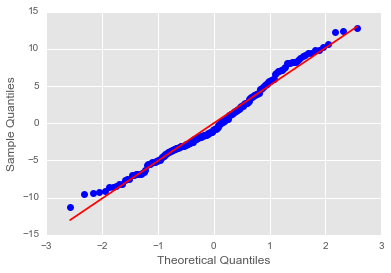

In [59]:
sm.qqplot(model_tv2.resid, line = 's')
pass




> ### Sales ~ Radio

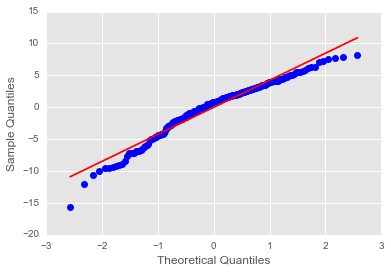

In [60]:
sm.qqplot(model_radio2.resid, line = 's')
pass




> ### Sales ~ Newspaper

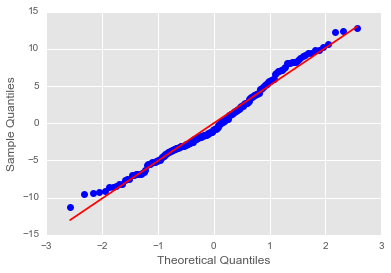

In [61]:
sm.qqplot(model_newspaper2.resid, line = 's')
pass




> ### Sales ~ TV + Radio + Newspaper

In [69]:
model_all = smf.ols(formula= 'Sales ~ 1 + TV + Radio + Newspaper', data= df).fit()
print model_all.summary()


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Wed, 03 Aug 2016   Prob (F-statistic):           8.35e-95
Time:                        20:31:15   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.0

> ### Sales ~ TV + Radio

In [70]:
# TODO
model_all_tv_radio = smf.ols(formula= 'Sales ~ 1 + TV + Radio', data= df).fit()
model_all_tv_radio.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     834.4
Date:                Wed, 03 Aug 2016   Prob (F-statistic):           2.60e-96
Time:                        20:33:02   Log-Likelihood:                -383.26
No. Observations:                 198   AIC:                             772.5
Df Residuals:                     195   BIC:                             782.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9315      0.297      9.861      0.000         2.345     3.518
TV             0.0457      0.001     32.385      0.000         0.043     0.048
Radio          0.1880      0.008     23.182      0.000         0.172     0.204
==============================================================================
Omnibus:                       59.228   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.127
Skew:                          -1.321   Prob(JB):                     3.06e-32
Kurtosis:                       6.257   Cond. No.                         423.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sm.qqplot(model.resid, line = 's')

pass

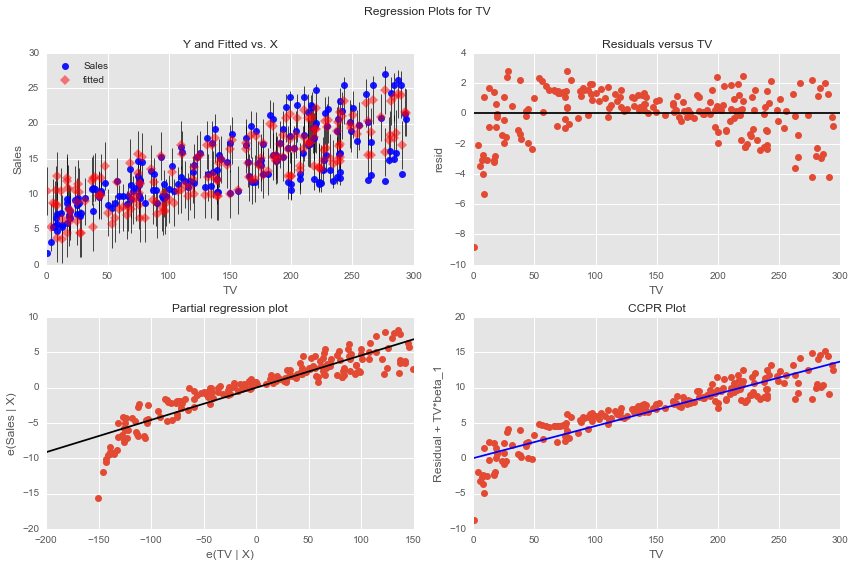

In [74]:

fig = plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model_all_tv_radio, 'TV', fig=fig)

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

## Part C - Interaction Effects

### Sales ~ TV + Radio + TV * Radio

In [81]:
model0 = smf.ols(formula = 'Sales ~ TV + Radio', data = df).fit()

print model0.summary()

print ""

model1 = smf.ols(formula = 'Sales ~ TV + Radio + TV * Radio', data = df).fit()

print model1.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     834.4
Date:                Wed, 03 Aug 2016   Prob (F-statistic):           2.60e-96
Time:                        20:45:15   Log-Likelihood:                -383.26
No. Observations:                 198   AIC:                             772.5
Df Residuals:                     195   BIC:                             782.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9315      0.297      9.861      0.0

In [ ]:
sm.qqplot(model.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV:Radio')

pass

## Part D - One-hot encoding for categorical variables

In [ ]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-07.csv'), index_col = 'ID')

In [ ]:
df.drop(df[df.IsAStudio == 1].index, inplace = True)

In [ ]:
smf.ols(formula = 'SalePrice ~ BathCount', data = df).fit().summary()

> ### What's the bathrooms' distribution in the dataset?

In [ ]:
# TODO

> ### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [ ]:
# TODO

> ### Let's use `pandas`'s `get_dummies` to create our one-hot encoding

In [ ]:
# TODO

In [ ]:
baths_df

In [ ]:
baths_df.rename(columns = {'Bath_1.0': 'Bath_1',
                           'Bath_2.0': 'Bath_2',
                           'Bath_3.0': 'Bath_3',
                           'Bath_4.0': 'Bath_4'}, inplace = True)

In [ ]:
baths_df

In [ ]:
df = df.join([baths_df])

In [ ]:
df.columns

## Activity | One-hot encoding for categorical variables

> ### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [ ]:
# TODO